In [62]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataframe
df = pd.read_csv("/Users/karmenmarkov/Library/CloudStorage/GoogleDrive-kkarmenmarkov@gmail.com/My Drive/masters_ppg/final_df_5_stages_stand.csv")


In [63]:
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

features = df.drop(columns=['5_stages'])  # Extract features excluding the label column 'PPG_GM','PPI_GM'

# Create an imputer object with a mean filling strategy
imputer = SimpleImputer(strategy='mean')
features_imputed = imputer.fit_transform(features)
features_imputed = pd.DataFrame(features_imputed, columns=features.columns)

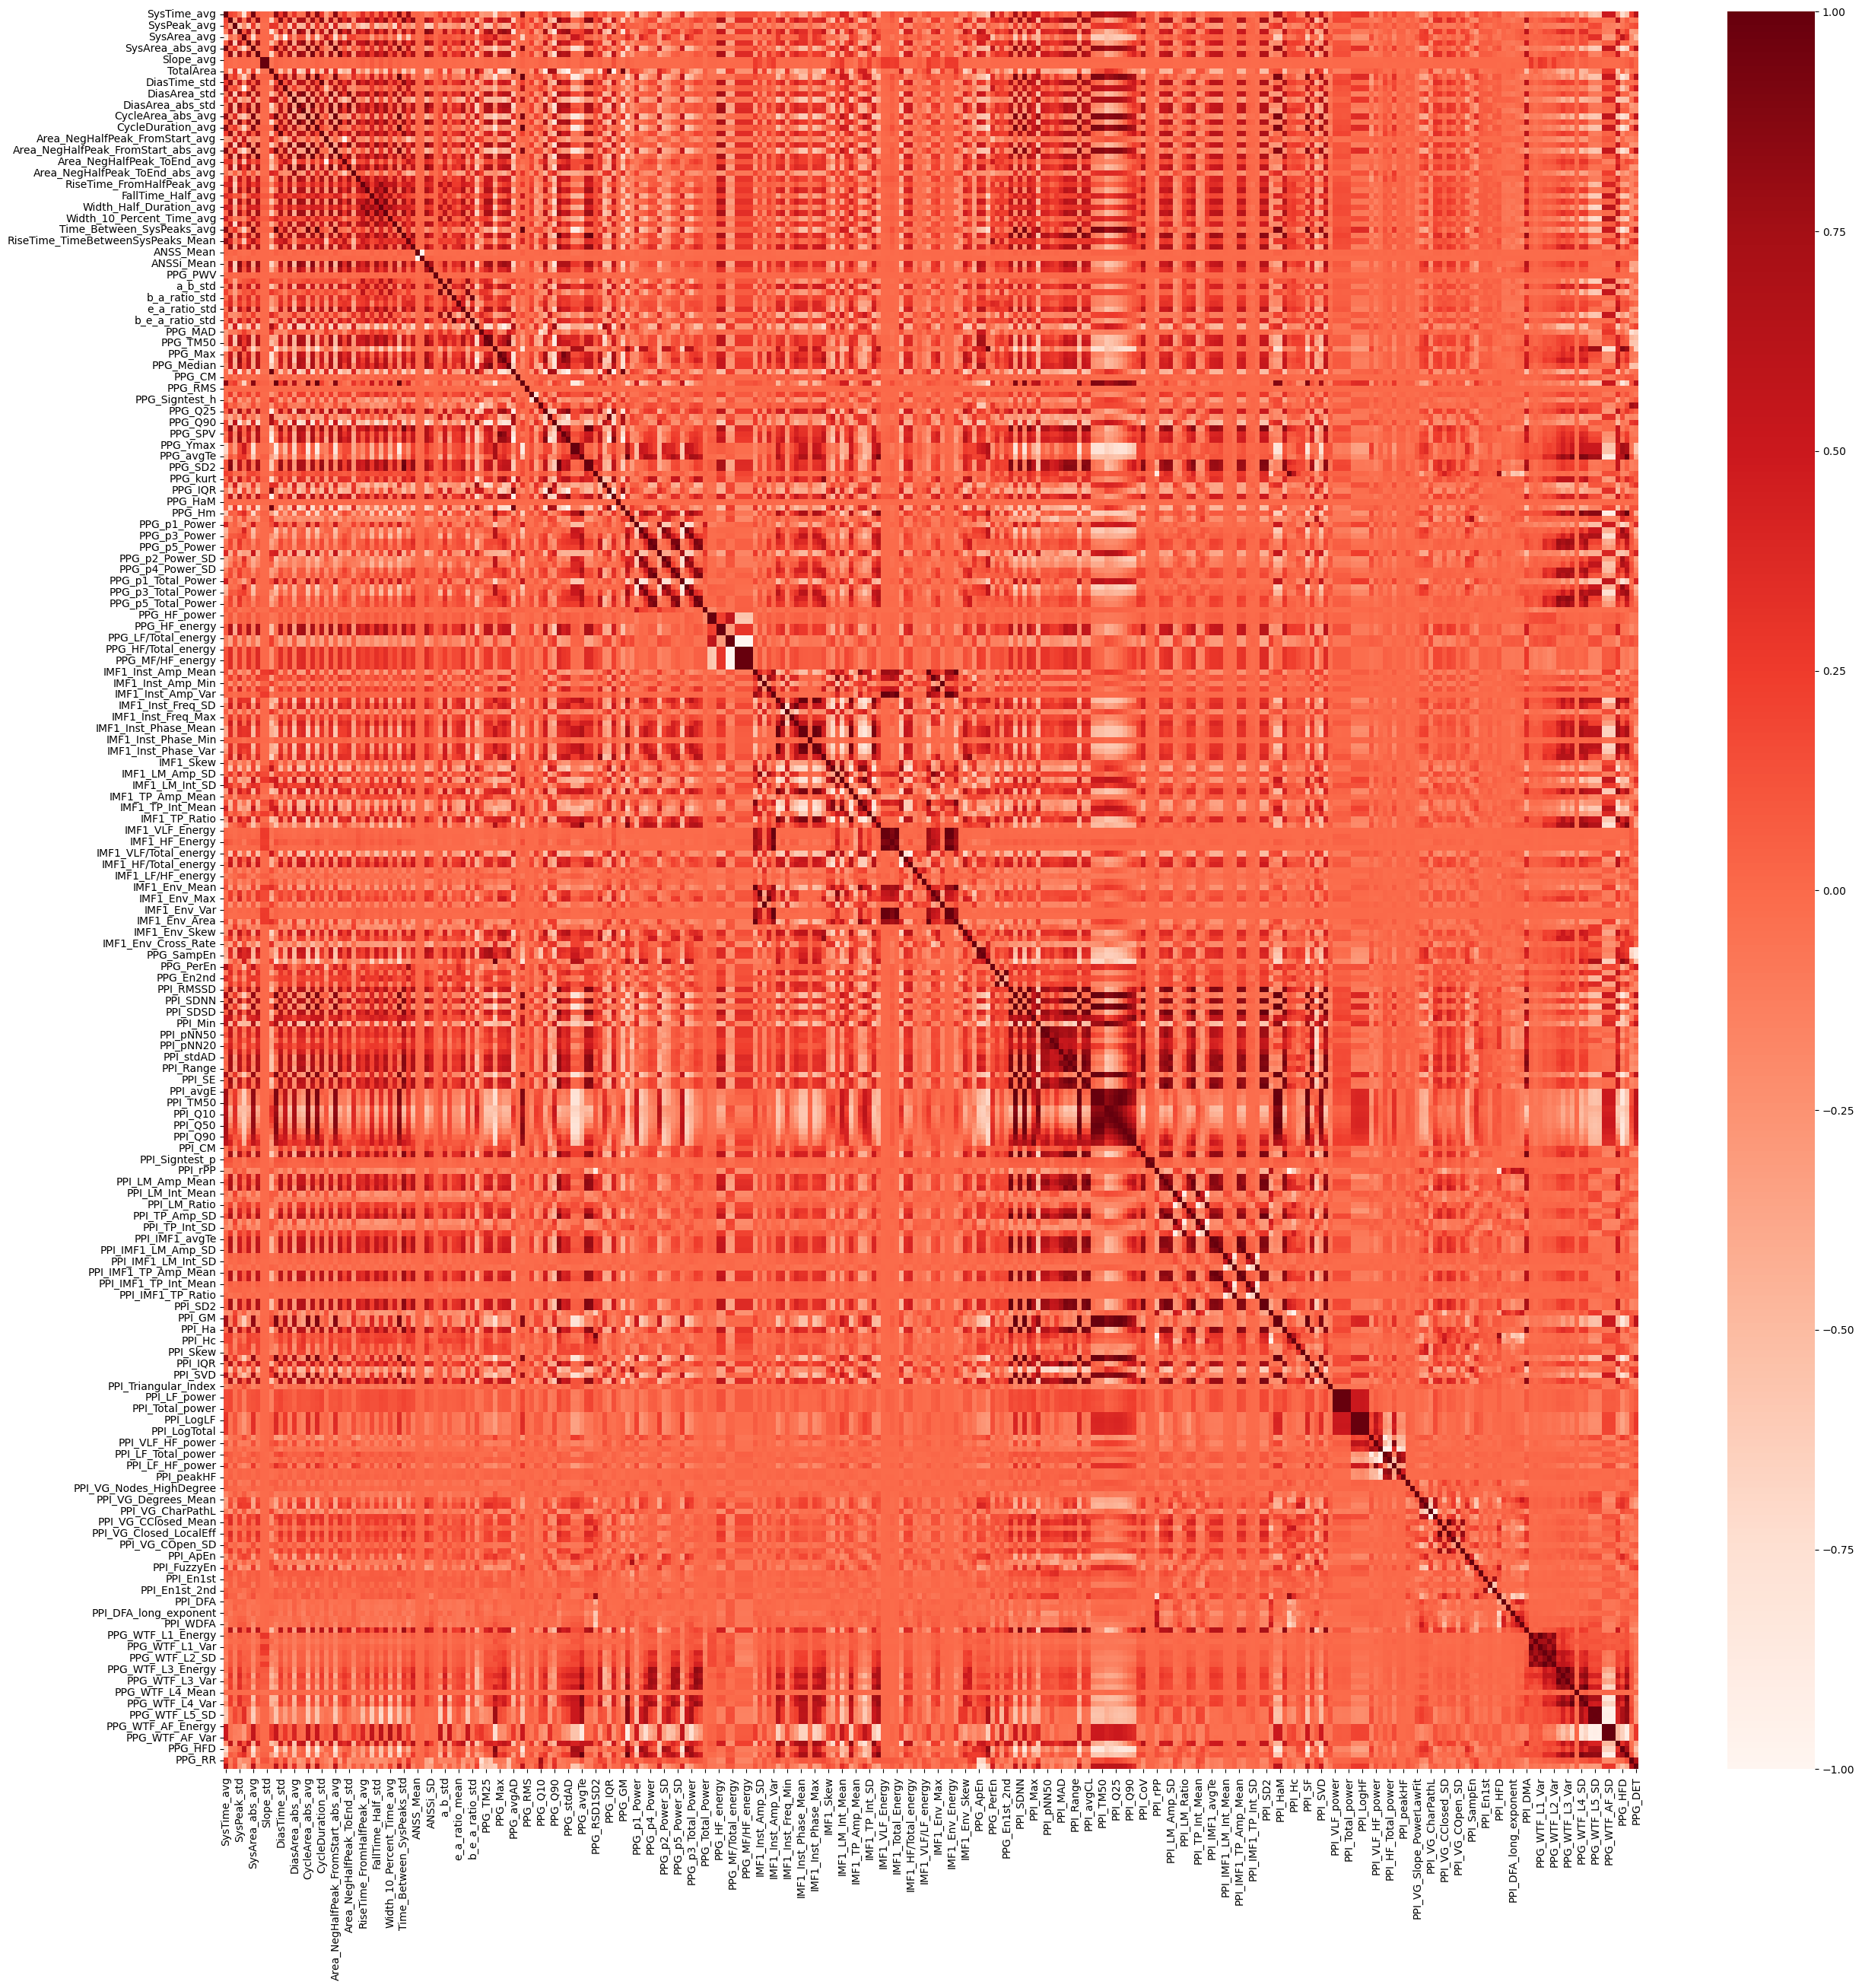

In [64]:
cor = features_imputed.corr()
plt.figure(figsize=(30,30))
sns.heatmap(cor, annot=False, cmap=plt.cm.Reds)
plt.show()


In [65]:
# Select upper triangle of correlation matrix
upper_tri = cor.where(np.triu(np.ones(cor.shape), k=1).astype(np.bool_))

# Find index of feature columns with correlation greater than 0.95
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.95)]

print("Columns to drop due to high correlation:", to_drop)


Columns to drop due to high correlation: ['Slope_std', 'CycleArea_abs_std', 'CycleDuration_avg', 'CycleDuration_std', 'Area_NegHalfPeak_FromStart_abs_avg', 'Area_NegHalfPeak_FromStart_abs_std', 'Time_Between_SysPeaks_avg', 'b_e_a_ratio_std', 'PPG_avgAD', 'PPG_RMSSD', 'PPG_Ymin', 'PPG_SD1', 'PPG_SD2', 'PPG_Hm', 'PPG_p5_Power_SD', 'PPG_Total_power2', 'PPG_Total_energy', 'PPG_MF/Total_energy', 'PPG_LF/HF_energy', 'PPG_MF/HF_energy', 'PPG_LF/MF_energy', 'IMF1_Inst_Freq_Var', 'IMF1_Inst_Phase_Mean', 'IMF1_Inst_Phase_SD', 'IMF1_Inst_Phase_Max', 'IMF1_Inst_Phase_Var', 'IMF1_TP_Ratio', 'IMF1_VLF_Energy', 'IMF1_LF_Energy', 'IMF1_Total_Energy', 'IMF1_Env_Mean', 'IMF1_Env_SD', 'IMF1_Env_Max', 'IMF1_Env_Min', 'IMF1_Env_Var', 'IMF1_Env_Energy', 'IMF1_Env_Area', 'PPG_FuzzyEn', 'PPG_En1st_2nd', 'PPI_Mean', 'PPI_SDSD', 'PPI_pNN50', 'PPI_stdAD', 'PPI_avgAD', 'PPI_Range', 'PPI_Median', 'PPI_SE', 'PPI_avgCL', 'PPI_avgE', 'PPI_TM25', 'PPI_TM50', 'PPI_Q5', 'PPI_Q10', 'PPI_Q25', 'PPI_Q50', 'PPI_Q75', 'PPI_C

In [66]:
# Drop these columns from the DataFrame
df_revised = df.drop(columns=to_drop)

In [67]:
# Check NaNs

#df_revised = df
nan_columns = df_revised.columns[df_revised.isna().any()].tolist()

print("Columns with NaN values:")
print(nan_columns)

nan_counts = df_revised.isna().sum()
print("Number of NaN values in each column:")
print(nan_counts[nan_counts > 0])

# Calculate the threshold for 10% of the total number of rows
threshold = 0.02 * len(df_revised)

# Filter columns where the number of NaN values exceeds the threshold
nan_columns_2percent = nan_counts[nan_counts >= threshold]

# Print the columns with NaN values exceeding the threshold
print("Columns with NaN values exceeding 2% of the total data:")
print(nan_columns_2percent)


Columns with NaN values:
['Slope_avg', 'a_b_mean', 'a_b_std', 'b_a_ratio_mean', 'b_a_ratio_std', 'e_a_ratio_mean', 'e_a_ratio_std', 'b_e_a_ratio_mean', 'PPI_RMSSD', 'PPI_RMS', 'PPI_SDNN', 'PPI_Max', 'PPI_Min', 'PPI_NN50', 'PPI_NN20', 'PPI_pNN20', 'PPI_MAD', 'PPI_Q90', 'PPI_Q95', 'PPI_CM', 'PPI_Signtest_p', 'PPI_Normalitytest_h', 'PPI_rPP', 'PPI_avgTe', 'PPI_LM_Amp_SD', 'PPI_LM_Int_Mean', 'PPI_LM_Int_SD', 'PPI_LM_Ratio', 'PPI_TP_Amp_Mean', 'PPI_TP_Int_SD', 'PPI_TP_Ratio', 'PPI_IMF1_avgTe', 'PPI_IMF1_LM_Amp_SD', 'PPI_IMF1_LM_Int_Mean', 'PPI_IMF1_LM_Int_SD', 'PPI_IMF1_LM_Ratio', 'PPI_IMF1_TP_Int_SD', 'PPI_RSD1SD2', 'PPI_Ha', 'PPI_Hm', 'PPI_Hc', 'PPI_Kurt', 'PPI_Skew', 'PPI_IQR', 'PPI_CCM', 'PPI_SVD', 'PPI_Triangular_Index', 'PPI_VLF_power', 'PPI_LogVLF', 'PPI_VLF_LF_power', 'PPI_VLF_HF_power', 'PPI_VLF_Total_power', 'PPI_LF_Total_power', 'PPI_HF_Total_power', 'PPI_LF_HF_power', 'PPI_peakVLF', 'PPI_peakHF', 'PPI_VG_Nodes_SmallDegree', 'PPI_VG_Nodes_HighDegree', 'PPI_VG_Slope_PowerLawFit', 

In [68]:
# Drop columns where more than 2% of data is NaNs
columns_to_drop = ['PPI_VG_Slope_PowerLawFit', 'PPI_VG_COpen_Mean', 'PPI_VG_COpen_SD']

# Drop the specified columns from the DataFrame
df_revised = df_revised.drop(columns=columns_to_drop)


In [69]:
# Load subjects
df_subjects = pd.read_csv("/Users/karmenmarkov/Library/CloudStorage/GoogleDrive-kkarmenmarkov@gmail.com/My Drive/masters_ppg/subjects.csv")

# Merge
df_revised = df_revised.copy()
df_revised['SubjectID'] = df_subjects['SubjectID']

# Assuming you've already done data preparation up to scaling
# Drop the '2_stages' and 'Subject' columns to get the features
X = df_revised.drop(['5_stages', 'SubjectID'], axis=1) #'PPI_GM', 'PPG_Hc', 'PPI_Signtest_h', 'PPI_Normalitytest_p', 'PPI_peakVLF'

# Convert labels and subjects for later use
y = df_revised['5_stages']
groups = df_revised['SubjectID']

# ADASYN

In [70]:
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import ADASYN
from imblearn.pipeline import Pipeline

def resample_within_groups(X, y, groups):
    unique_groups = np.unique(groups)
    resampled_X, resampled_y, resampled_groups = [], [], []
    imputer = SimpleImputer(strategy='mean')  # Define the imputer

    for group in unique_groups:
        mask = groups == group
        X_g, y_g = X[mask], y[mask]

        # Impute missing values
        X_g = imputer.fit_transform(X_g)

        # Define the resampling pipeline
        resample_pipeline = Pipeline([
            ('adasyn', ADASYN(sampling_strategy='auto', n_neighbors = 5, random_state=42)),  # Oversample the minority class to 90% of the majority
        ])

        try:
            X_resampled_g, y_resampled_g = resample_pipeline.fit_resample(X_g, y_g)
        except ValueError:
            print(f"Resampling failed for group {group}, using original samples.")
            X_resampled_g, y_resampled_g = X_g, y_g  # Fallback to original data

        resampled_X.append(pd.DataFrame(X_resampled_g, columns=X.columns))
        resampled_y.append(pd.Series(y_resampled_g))
        resampled_groups.extend([group] * len(y_resampled_g))

    return pd.concat(resampled_X, ignore_index=True), pd.concat(resampled_y, ignore_index=True), np.array(resampled_groups)
# Then you can call this function as before:
X_resampled, y_resampled, groups_resampled = resample_within_groups(X, y, groups)


Resampling failed for group ins2, using original samples.
Resampling failed for group ins5, using original samples.
Resampling failed for group ins7, using original samples.
Resampling failed for group ins8, using original samples.
Resampling failed for group n11, using original samples.
Resampling failed for group n3, using original samples.
Resampling failed for group narco4, using original samples.
Resampling failed for group nfle11, using original samples.
Resampling failed for group nfle16, using original samples.
Resampling failed for group nfle18, using original samples.
Resampling failed for group nfle25, using original samples.
Resampling failed for group nfle29, using original samples.
Resampling failed for group nfle30, using original samples.
Resampling failed for group nfle36, using original samples.
Resampling failed for group nfle37, using original samples.
Resampling failed for group nfle38, using original samples.
Resampling failed for group nfle4, using original sampl

In [71]:
# Get classes in X_train
label_counts = y_resampled.value_counts()
print(label_counts)

5_stages
2    34055
3    31723
0    30159
4    29214
1    24429
Name: count, dtype: int64


# Feature selection

In [73]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

sfm = SelectFromModel(estimator=RandomForestClassifier(n_estimators=100, random_state=42))
sfm.fit(X, y)

# Get the boolean mask indicating which features are selected
selected_features_mask = sfm.get_support()

# Get the names of the selected features from the original DataFrame
selected_features = X.columns[selected_features_mask]

print("Selected features:", selected_features)

Selected features: Index(['SysTime_avg', 'SysTime_std', 'SysPeak_avg', 'SysArea_avg',
       'SysArea_std', 'SysArea_abs_avg', 'Slope_avg', 'TotalArea',
       'DiasTime_avg', 'DiasArea_avg',
       ...
       'PPI_HFD', 'PPI_PDFA', 'PPI_WDFA', 'PPG_WTF_L4_Energy', 'PPG_WTF_L4_SD',
       'PPG_WTF_L5_Energy', 'PPG_LC', 'PPG_HFD', 'PPG_RR', 'PPG_DET'],
      dtype='object', length=102)


In [74]:
X_selected = X_resampled[selected_features]
X_selected

,SysTime_avg,SysTime_std,SysPeak_avg,SysArea_avg,SysArea_std,SysArea_abs_avg,Slope_avg,TotalArea,DiasTime_avg,DiasArea_avg,...,PPI_HFD,PPI_PDFA,PPI_WDFA,PPG_WTF_L4_Energy,PPG_WTF_L4_SD,PPG_WTF_L5_Energy,PPG_LC,PPG_HFD,PPG_RR,PPG_DET
0,0.243075,0.106977,2.051287,-1.285312,14.791261,0.190149,0.129524,20.185956,0.665483,1.261417,...,1.840314,1.408947,1.041127,73.786172,0.544357,469.265490,56.679685,1.596500,0.103262,0.916861
1,0.343277,0.225440,1.927268,2.661957,17.248446,0.190526,0.250397,18.963432,0.897964,-2.347344,...,1.670130,0.518060,1.191702,124.451367,0.706797,986.855721,59.669821,1.481480,0.100278,0.961463
2,0.274200,0.101530,2.242864,0.956881,15.603188,0.206661,0.152634,22.063562,0.709604,-0.729983,...,1.935544,0.171287,0.566286,47.301892,0.435842,452.286898,61.623213,1.512300,0.070013,0.889709
3,0.437240,0.398992,2.824896,-1.905432,15.568619,0.304404,0.299215,21.087311,0.984896,2.499454,...,1.842306,0.499770,0.691065,357.419869,1.197743,748.970794,62.408353,1.531390,0.075477,0.864056
4,0.274282,0.135000,2.913433,1.484555,19.700900,0.274228,0.094563,25.268359,0.757390,-1.118548,...,1.902181,0.976507,1.272573,51.561563,0.455048,495.221854,56.876811,1.638568,0.066558,0.853705
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149575,0.386473,0.125079,2.873188,4.858204,6.585128,0.389500,0.133147,25.315087,1.048875,-4.273388,...,2.036183,0.710882,0.685203,13.275323,0.230770,253.919113,49.007048,1.344909,0.075349,0.925177
149576,0.428169,0.120045,2.886731,3.706262,5.812741,0.417641,0.147421,25.690660,1.101717,-4.197693,...,2.014052,0.562885,0.864568,14.594743,0.242097,260.111118,47.842830,1.327297,0.084838,0.937060
149577,0.425553,0.128165,2.847058,2.885821,6.359761,0.413053,0.147656,25.526429,1.088532,-4.037440,...,2.006056,0.453029,0.702301,14.773317,0.243571,246.939956,48.936007,1.326433,0.085194,0.939587
149578,0.407010,0.136410,2.735384,1.612075,12.352814,0.385894,0.149957,24.501778,1.060273,-1.655144,...,2.027785,0.621875,0.836162,18.264938,0.267303,284.880906,49.406278,1.342954,0.088592,0.939991


# Hyperparameter tuning

In [80]:
from sklearn.model_selection import train_test_split, GroupKFold, RandomizedSearchCV, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from scipy.stats import randint as sp_randint
from sklearn.metrics import make_scorer, matthews_corrcoef

# Split your data into a smaller subset for quick exploration
X_sample, _, y_sample, _, groups_sample, _ = train_test_split(X_selected, y_resampled, groups_resampled, test_size=0.5, random_state=42, stratify = y_resampled)

# Initialize the pipeline with the steps
pipeline_rf = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Define parameters for RandomizedSearchCV, ensuring they're prefixed according to the pipeline steps
param_dist_rf = {
    'classifier__n_estimators': sp_randint(100, 500),
    'classifier__max_depth': [None] + list(range(3, 20)),
    'classifier__min_samples_split': sp_randint(2, 11),
    'classifier__min_samples_leaf': sp_randint(1, 11),
    'classifier__max_features': [None, 'sqrt', 'log2'],
    'classifier__bootstrap': [True, False]
}


class VerboseGroupKFold(GroupKFold):
    def __init__(self, n_splits=3, verbose=0):
        super().__init__(n_splits)
        self.verbose = verbose

    def split(self, X, y=None, groups=None):
        for fold, (train_index, test_index) in enumerate(super().split(X, y, groups)):
            if self.verbose > 0:
                print(f"Starting fold {fold + 1}")
            yield train_index, test_index
            if self.verbose > 0:
                print(f"Finished fold {fold + 1}")

# Then use VerboseGroupKFold in your RandomizedSearchCV
verbose_gkf = VerboseGroupKFold(n_splits=3, verbose=1)

# Define MCC as the scoring metric using make_scorer
mcc_scorer = make_scorer(matthews_corrcoef)

# Set up RandomizedSearchCV with the pipeline
random_search_rf = RandomizedSearchCV(
    estimator=pipeline_rf,  # Use the pipeline as the estimator
    param_distributions=param_dist_rf,
    n_iter=100,  # Adjust based on computational resources
    scoring=mcc_scorer,  # Choose an appropriate scoring method
    n_jobs=-1,  # Use all available cores
    cv=verbose_gkf.split(X_sample, y_sample, groups_sample),  # Ensure GroupKFold uses group information
    verbose=3,
    random_state=42,
)

# Fit RandomizedSearchCV
random_search_rf.fit(X_sample, y_sample)

# After fitting, output the best parameters and score
print("Best parameters found: ", random_search_rf.best_params_)
print("Best score: ", random_search_rf.best_score_)

Starting fold 1
Finished fold 1
Starting fold 2
Finished fold 2
Starting fold 3
Finished fold 3
Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV 3/3] END classifier__bootstrap=True, classifier__max_depth=16, classifier__max_features=log2, classifier__min_samples_leaf=8, classifier__min_samples_split=6, classifier__n_estimators=202;, score=0.080 total time= 1.5min
[CV 2/3] END classifier__bootstrap=True, classifier__max_depth=16, classifier__max_features=log2, classifier__min_samples_leaf=8, classifier__min_samples_split=6, classifier__n_estimators=202;, score=0.106 total time= 1.5min
[CV 1/3] END classifier__bootstrap=True, classifier__max_depth=16, classifier__max_features=log2, classifier__min_samples_leaf=8, classifier__min_samples_split=6, classifier__n_estimators=202;, score=0.100 total time= 1.6min
[CV 3/3] END classifier__bootstrap=False, classifier__max_depth=12, classifier__max_features=log2, classifier__min_samples_leaf=8, classifier__min_samples_split=6, cl

/Users/karmenmarkov/anaconda3/lib/python3.11/site-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


[CV 1/3] END classifier__bootstrap=True, classifier__max_depth=4, classifier__max_features=None, classifier__min_samples_leaf=5, classifier__min_samples_split=8, classifier__n_estimators=140;, score=0.095 total time= 5.1min
[CV 2/3] END classifier__bootstrap=True, classifier__max_depth=4, classifier__max_features=None, classifier__min_samples_leaf=5, classifier__min_samples_split=8, classifier__n_estimators=140;, score=0.078 total time= 5.0min
[CV 3/3] END classifier__bootstrap=True, classifier__max_depth=4, classifier__max_features=None, classifier__min_samples_leaf=5, classifier__min_samples_split=8, classifier__n_estimators=140;, score=0.051 total time= 5.0min
[CV 1/3] END classifier__bootstrap=False, classifier__max_depth=13, classifier__max_features=None, classifier__min_samples_leaf=1, classifier__min_samples_split=4, classifier__n_estimators=463;, score=0.056 total time=72.1min
[CV 2/3] END classifier__bootstrap=False, classifier__max_depth=13, classifier__max_features=None, cla

In [81]:
from sklearn.model_selection import train_test_split, GroupKFold, RandomizedSearchCV, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from scipy.stats import randint as sp_randint
from sklearn.metrics import make_scorer, matthews_corrcoef

# Initialize the pipeline with the steps
pipeline_rf = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Define the GroupKFold cross-validator
gkf = GroupKFold(n_splits=3)

# Define MCC as the scoring metric using make_scorer
mcc_scorer = make_scorer(matthews_corrcoef)


# Define the parameter grid based on the results of random search
param_grid_rf = {
    'classifier__bootstrap': [False, True],
    'classifier__max_depth': [10, 18],
    'classifier__max_features': ['sqrt', 'log2'],
    'classifier__min_samples_leaf': [1, 3],
    'classifier__min_samples_split': [3, 4],
    'classifier__n_estimators': [229, 300, 500]
}

# Set up GridSearchCV with the pipeline
grid_search_rf = GridSearchCV(
    estimator=pipeline_rf,
    param_grid=param_grid_rf,
    scoring=mcc_scorer,
    n_jobs=-1,
    cv=gkf.split(X_selected, y_resampled, groups=groups_resampled),
    verbose=3
)

# Fit GridSearchCV
grid_search_rf.fit(X_selected, y_resampled)

# Output the best parameters and score from grid search
print("Best parameters found: ", grid_search_rf.best_params_)
print("Best score: ", grid_search_rf.best_score_)

Fitting 3 folds for each of 96 candidates, totalling 288 fits
[CV 1/3] END classifier__bootstrap=False, classifier__max_depth=10, classifier__max_features=sqrt, classifier__min_samples_leaf=1, classifier__min_samples_split=3, classifier__n_estimators=229;, score=0.113 total time= 7.4min
[CV 2/3] END classifier__bootstrap=False, classifier__max_depth=10, classifier__max_features=sqrt, classifier__min_samples_leaf=1, classifier__min_samples_split=3, classifier__n_estimators=229;, score=0.091 total time= 7.5min
[CV 3/3] END classifier__bootstrap=False, classifier__max_depth=10, classifier__max_features=sqrt, classifier__min_samples_leaf=1, classifier__min_samples_split=3, classifier__n_estimators=229;, score=0.106 total time= 7.5min
[CV 2/3] END classifier__bootstrap=False, classifier__max_depth=10, classifier__max_features=sqrt, classifier__min_samples_leaf=1, classifier__min_samples_split=3, classifier__n_estimators=300;, score=0.091 total time= 9.4min
[CV 1/3] END classifier__bootstrap

/Users/karmenmarkov/anaconda3/lib/python3.11/site-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


[CV 1/3] END classifier__bootstrap=False, classifier__max_depth=18, classifier__max_features=sqrt, classifier__min_samples_leaf=1, classifier__min_samples_split=3, classifier__n_estimators=229;, score=0.117 total time= 9.0min
[CV 3/3] END classifier__bootstrap=False, classifier__max_depth=18, classifier__max_features=sqrt, classifier__min_samples_leaf=1, classifier__min_samples_split=3, classifier__n_estimators=229;, score=0.102 total time= 9.2min
[CV 1/3] END classifier__bootstrap=False, classifier__max_depth=18, classifier__max_features=sqrt, classifier__min_samples_leaf=1, classifier__min_samples_split=3, classifier__n_estimators=300;, score=0.118 total time=11.7min
[CV 2/3] END classifier__bootstrap=False, classifier__max_depth=18, classifier__max_features=sqrt, classifier__min_samples_leaf=1, classifier__min_samples_split=3, classifier__n_estimators=300;, score=0.100 total time=11.8min
[CV 3/3] END classifier__bootstrap=False, classifier__max_depth=18, classifier__max_features=sqr

# Model training

# 5-fold CV

In [82]:
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score, matthews_corrcoef
from sklearn.ensemble import RandomForestClassifier
from imblearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GroupKFold
from sklearn.model_selection import cross_val_predict

# Define your classifier with the best parameters found
rf_classifier = RandomForestClassifier(
    bootstrap=False,
    max_depth=18,
    max_features='sqrt',
    min_samples_leaf=1,
    min_samples_split=4,
    n_estimators=229,
    random_state=42
)

# Create the pipeline
pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('classifier', rf_classifier)
])

# Initialize GroupKFold
gkf = GroupKFold(n_splits=5)

# Collect the metrics for each fold
fold_metrics = {
    'Accuracy': [],
    'Sensitivity': [],
    'Specificity': [],
    'Precision': [],
    'F1 Score': [],
    'MCC': []
}

# Number of classes, assuming 3 for a 3-stage classifier
n_classes = 5

# Collect the specificity for each fold
fold_specificity = []

# Initialize the confusion matrix
final_confusion_matrix_5cv = np.zeros((5, 5), dtype=int)

# Loop through the folds in GroupKFold
for train_index, test_index in gkf.split(X_selected, y_resampled, groups=groups_resampled):
    # Split data
    X_train, X_test = X_selected.iloc[train_index], X_selected.iloc[test_index]
    y_train, y_test = y_resampled.iloc[train_index], y_resampled.iloc[test_index]

    # Print the class distribution in the test set
    print("Test set distribution:", y_test.value_counts())

    # Fit the pipeline on the training set
    pipeline.fit(X_train, y_train)

    # Predict on the test set
    y_pred = pipeline.predict(X_test)

    # Calculate the confusion matrix for this fold
    fold_confusion_matrix = confusion_matrix(y_test, y_pred)

    # Update the final confusion matrix
    final_confusion_matrix_5cv += confusion_matrix(y_test, y_pred)

    # Calculate specificity for each class
    class_specificities = []
    for class_index in range(n_classes):
        true_negative = np.sum(fold_confusion_matrix) - np.sum(fold_confusion_matrix[class_index, :]) - np.sum(fold_confusion_matrix[:, class_index]) + fold_confusion_matrix[class_index, class_index]
        false_positive = np.sum(fold_confusion_matrix[:, class_index]) - fold_confusion_matrix[class_index, class_index]
        class_specificity = true_negative / (true_negative + false_positive) if (true_negative + false_positive) > 0 else 0
        class_specificities.append(class_specificity)
    
    # Compute the average specificity for this fold
    average_specificity = np.mean(class_specificities)
    fold_specificity.append(average_specificity)

    # Calculate metrics for the fold (using average='micro' for multi-class problems)
    fold_accuracy = accuracy_score(y_test, y_pred)
    fold_sensitivity = recall_score(y_test, y_pred, average='micro')  # Same as sensitivity
    fold_precision = precision_score(y_test, y_pred, average='micro')
    fold_f1 = f1_score(y_test, y_pred, average='micro')
    fold_mcc = matthews_corrcoef(y_test, y_pred)

    # Append metrics for the fold
    fold_metrics['Accuracy'].append(fold_accuracy)
    fold_metrics['Sensitivity'].append(fold_sensitivity)
    fold_metrics['Specificity'].append(average_specificity)
    fold_metrics['Precision'].append(fold_precision)
    fold_metrics['F1 Score'].append(fold_f1)
    fold_metrics['MCC'].append(fold_mcc)
    

# Convert the metrics dictionary to a DataFrame
metrics_df_5cv = pd.DataFrame(fold_metrics)
# Calculate mean and standard deviation for the metrics
metrics_mean_5cv = metrics_df_5cv.mean()
metrics_std_5cv = metrics_df_5cv.std()

# Print out the mean and standard deviation for the metrics
print(metrics_mean_5cv)
print(metrics_std_5cv)
print('Final Confusion Matrix:\n', final_confusion_matrix_5cv)


Test set distribution: 5_stages
2    6885
3    6042
0    5957
4    5918
1    5303
Name: count, dtype: int64
Test set distribution: 5_stages
2    6694
3    6152
0    5994
4    5741
1    4728
Name: count, dtype: int64
Test set distribution: 5_stages
2    6667
3    6380
0    6152
4    5630
1    5184
Name: count, dtype: int64
Test set distribution: 5_stages
2    7055
3    6586
4    6064
0    5848
1    4550
Name: count, dtype: int64
Test set distribution: 5_stages
2    6754
3    6563
0    6208
4    5861
1    4664
Name: count, dtype: int64
Accuracy       0.287990
Sensitivity    0.287990
Specificity    0.818631
Precision      0.287990
F1 Score       0.287990
MCC            0.102051
dtype: float64
Accuracy       0.046202
Sensitivity    0.046202
Specificity    0.011655
Precision      0.046202
F1 Score       0.046202
MCC            0.061544
dtype: float64
Final Confusion Matrix:
 [[13732   487 11453  2065  2422]
 [ 7404   977 12039  2010  1999]
 [ 7503   490 18624  3571  3867]
 [ 7114   401 1636

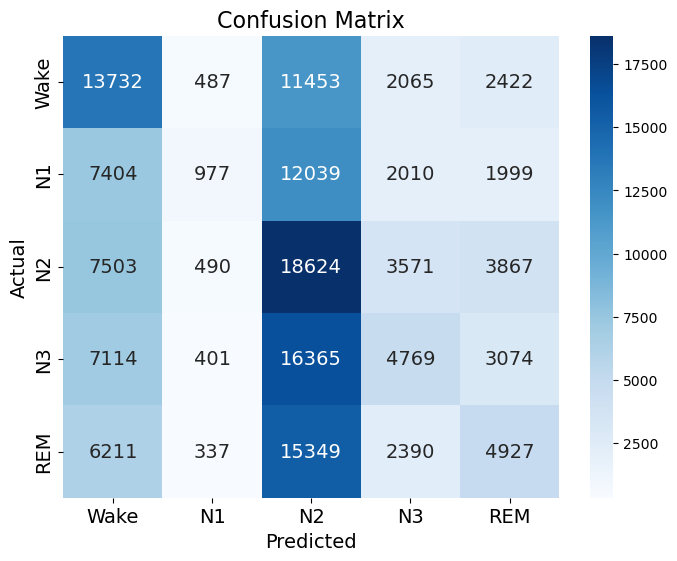

In [83]:
#plot the confusion matrix plot for train data
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
cm = final_confusion_matrix_5cv

# Plot confusion matrix using seaborn
plt.figure(figsize=(8, 6))
font_size = 14
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Wake', 'N1', 'N2', 'N3', 'REM'], yticklabels=['Wake', 'N1', 'N2', 'N3', 'REM'], annot_kws={"size": font_size})
plt.ylabel('Actual', fontsize=font_size)
plt.xlabel('Predicted', fontsize=font_size)
plt.title('Confusion Matrix', fontsize=font_size+2)
plt.xticks(fontsize=font_size)
plt.yticks(fontsize=font_size)
plt.show()

In [84]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from imblearn.pipeline import Pipeline
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import GroupKFold
import numpy as np
import pandas as pd


# Wrap the RandomForestClassifier in a OneVsRestClassifier
ovr_classifier = OneVsRestClassifier(rf_classifier)

# Create the pipeline
pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('classifier', ovr_classifier)
])

# Initialize GroupKFold
gkf = GroupKFold(n_splits=5)

# Define the number of classes
n_classes = 5

# Initialize arrays to store results
fold_metrics = []
feature_importances = {i: [] for i in range(n_classes)}  # Store importances per class

# Loop through the folds in GroupKFold
for train_index, test_index in gkf.split(X_selected, y_resampled, groups=groups_resampled):
    X_train, X_test = X_selected.iloc[train_index], X_selected.iloc[test_index]
    y_train, y_test = y_resampled.iloc[train_index], y_resampled.iloc[test_index]

    # Fit the pipeline on the training set
    pipeline.fit(X_train, y_train)

    # Predict on the test set
    y_pred = pipeline.predict(X_test)

    # Calculate the confusion matrix
    fold_confusion_matrix = confusion_matrix(y_test, y_pred)

    # Collect feature importances for each class
    for i, estimator in enumerate(pipeline.named_steps['classifier'].estimators_):
        feature_importances[i].append(estimator.feature_importances_)

    # Collect and compute other metrics (omitted for brevity)

# Average the feature importances over all folds for each class
average_importances = {class_idx: np.mean(importances, axis=0) for class_idx, importances in feature_importances.items()}


In [85]:
# Assume 'feature_names' is a list of your feature names from 'X_selected'
feature_names = X_selected.columns.tolist()

# Convert the dictionary of importances to a DataFrame
importances_df_cv5 = pd.DataFrame({
    'Feature': feature_names,
    'Class 0 Importances': average_importances[0],
    'Class 1 Importances': average_importances[1],
    'Class 2 Importances': average_importances[2],
    'Class 3 Importances': average_importances[3],
    'Class 4 Importances': average_importances[4]
})

# Adding a column for the overall importance (mean)
importances_df_cv5['Overall Importance (Mean)'] = importances_df_cv5[['Class 0 Importances', 'Class 1 Importances', 'Class 2 Importances', 'Class 3 Importances', 'Class 4 Importances']].mean(axis=1)

# Print or save the DataFrame
importances_df_cv5

,Feature,Class 0 Importances,Class 1 Importances,Class 2 Importances,Class 3 Importances,Class 4 Importances,Overall Importance (Mean)
0,SysTime_avg,0.008527,0.008494,0.009318,0.010749,0.010468,0.009511
1,SysTime_std,0.008853,0.009105,0.008207,0.009117,0.008538,0.008764
2,SysPeak_avg,0.010331,0.009542,0.008891,0.008784,0.009369,0.009384
3,SysArea_avg,0.009240,0.010625,0.010159,0.012064,0.012357,0.010889
4,SysArea_std,0.008823,0.010272,0.008500,0.007168,0.007559,0.008465
...,...,...,...,...,...,...,...
97,PPG_WTF_L5_Energy,0.008009,0.008765,0.008463,0.007923,0.008116,0.008255
98,PPG_LC,0.016535,0.009708,0.010847,0.008680,0.010887,0.011331
99,PPG_HFD,0.010078,0.009337,0.009274,0.009594,0.008692,0.009395
100,PPG_RR,0.008313,0.009598,0.009385,0.007472,0.008327,0.008619


## 10-fold CV

In [86]:
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score, matthews_corrcoef
from sklearn.ensemble import RandomForestClassifier
from imblearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GroupKFold
from sklearn.model_selection import cross_val_predict


# Create the pipeline
pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('classifier', rf_classifier)
])

# Initialize GroupKFold
gkf = GroupKFold(n_splits=10)

# Collect the metrics for each fold
fold_metrics = {
    'Accuracy': [],
    'Sensitivity': [],
    'Specificity': [],
    'Precision': [],
    'F1 Score': [],
    'MCC': []
}

# Number of classes, assuming 3 for a 3-stage classifier
n_classes = 5

# Collect the specificity for each fold
fold_specificity = []

# Initialize the confusion matrix
final_confusion_matrix_10cv = np.zeros((5, 5), dtype=int)

# Loop through the folds in GroupKFold
for train_index, test_index in gkf.split(X_selected, y_resampled, groups=groups_resampled):
    # Split data
    X_train, X_test = X_selected.iloc[train_index], X_selected.iloc[test_index]
    y_train, y_test = y_resampled.iloc[train_index], y_resampled.iloc[test_index]

    # Print the class distribution in the test set
    print("Test set distribution:", y_test.value_counts())

    # Fit the pipeline on the training set
    pipeline.fit(X_train, y_train)

    # Predict on the test set
    y_pred = pipeline.predict(X_test)

    # Calculate the confusion matrix for this fold
    fold_confusion_matrix = confusion_matrix(y_test, y_pred)

    # Update the final confusion matrix
    final_confusion_matrix_10cv += confusion_matrix(y_test, y_pred)

    # Calculate specificity for each class
    class_specificities = []
    for class_index in range(n_classes):
        true_negative = np.sum(fold_confusion_matrix) - np.sum(fold_confusion_matrix[class_index, :]) - np.sum(fold_confusion_matrix[:, class_index]) + fold_confusion_matrix[class_index, class_index]
        false_positive = np.sum(fold_confusion_matrix[:, class_index]) - fold_confusion_matrix[class_index, class_index]
        class_specificity = true_negative / (true_negative + false_positive) if (true_negative + false_positive) > 0 else 0
        class_specificities.append(class_specificity)

    # Compute the average specificity for this fold
    average_specificity = np.mean(class_specificities)
    fold_specificity.append(average_specificity)

    # Calculate metrics for the fold (using average='micro' for multi-class problems)
    fold_accuracy = accuracy_score(y_test, y_pred)
    fold_sensitivity = recall_score(y_test, y_pred, average='micro')  # Same as sensitivity
    fold_precision = precision_score(y_test, y_pred, average='micro')
    fold_f1 = f1_score(y_test, y_pred, average='micro')
    fold_mcc = matthews_corrcoef(y_test, y_pred)

    # Append metrics for the fold
    fold_metrics['Accuracy'].append(fold_accuracy)
    fold_metrics['Sensitivity'].append(fold_sensitivity)
    fold_metrics['Specificity'].append(average_specificity)
    fold_metrics['Precision'].append(fold_precision)
    fold_metrics['F1 Score'].append(fold_f1)
    fold_metrics['MCC'].append(fold_mcc)


# Convert the metrics dictionary to a DataFrame
metrics_df_10cv = pd.DataFrame(fold_metrics)
# Calculate mean and standard deviation for the metrics
metrics_mean_10cv = metrics_df_10cv.mean()
metrics_std_10cv = metrics_df_10cv.std()

# Print out the mean and standard deviation for the metrics
print(metrics_mean_10cv)
print(metrics_std_10cv)
print('Final Confusion Matrix:\n', final_confusion_matrix_10cv)


Test set distribution: 5_stages
2    3836
0    3344
3    3108
4    2904
1    2155
Name: count, dtype: int64
Test set distribution: 5_stages
2    3449
4    3197
3    3112
0    2953
1    2700
Name: count, dtype: int64
Test set distribution: 5_stages
0    3479
2    3334
3    2829
4    2692
1    2297
Name: count, dtype: int64
Test set distribution: 5_stages
2    3307
3    3297
4    3103
0    2569
1    2366
Name: count, dtype: int64
Test set distribution: 5_stages
2    3630
3    3523
4    2968
0    2933
1    2363
Name: count, dtype: int64
Test set distribution: 5_stages
2    3295
0    3060
3    2899
4    2821
1    2641
Name: count, dtype: int64
Test set distribution: 5_stages
3    3561
2    3423
4    3094
0    2835
1    2433
Name: count, dtype: int64
Test set distribution: 5_stages
3    3158
2    3150
0    2865
4    2839
1    2625
Name: count, dtype: int64
Test set distribution: 5_stages
2    3460
0    3308
3    3005
4    2679
1    2256
Name: count, dtype: int64
Test set distribution: 5_sta

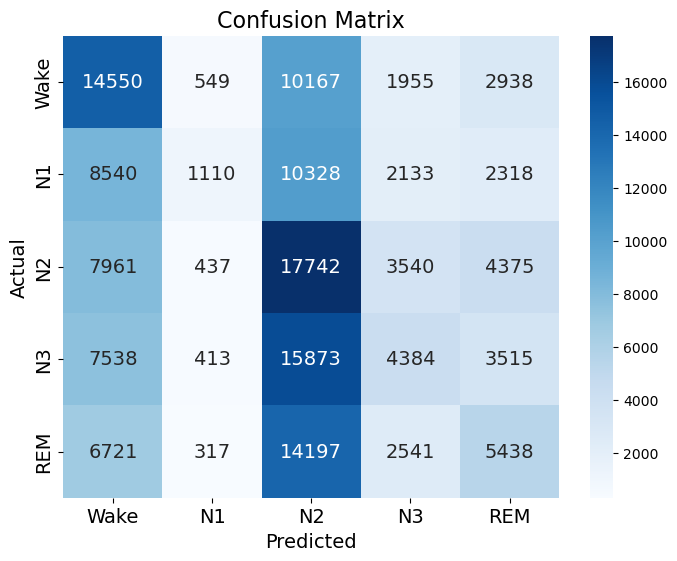

In [87]:
#plot the confusion matrix plot for train data
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
cm = final_confusion_matrix_10cv

# Plot confusion matrix using seaborn
plt.figure(figsize=(8, 6))
font_size = 14
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Wake', 'N1', 'N2', 'N3', 'REM'], yticklabels=['Wake', 'N1', 'N2', 'N3', 'REM'], annot_kws={"size": font_size})
plt.ylabel('Actual', fontsize=font_size)
plt.xlabel('Predicted', fontsize=font_size)
plt.title('Confusion Matrix', fontsize=font_size+2)
plt.xticks(fontsize=font_size)
plt.yticks(fontsize=font_size)
plt.show()

In [88]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from imblearn.pipeline import Pipeline
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import GroupKFold


from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score, matthews_corrcoef
from sklearn.ensemble import RandomForestClassifier
from imblearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GroupKFold
from sklearn.model_selection import cross_val_predict


# Create the pipeline
pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('classifier', rf_classifier)
])

# Wrap the RandomForestClassifier in a OneVsRestClassifier
ovr_classifier = OneVsRestClassifier(rf_classifier)

# Create the pipeline
pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('classifier', ovr_classifier)
])

# Initialize GroupKFold
gkf = GroupKFold(n_splits=10)

# Define the number of classes
n_classes = 5

# Initialize arrays to store results
fold_metrics = []
feature_importances = {i: [] for i in range(n_classes)}  # Store importances per class

# Loop through the folds in GroupKFold
for train_index, test_index in gkf.split(X_selected, y_resampled, groups=groups_resampled):
    X_train, X_test = X_selected.iloc[train_index], X_selected.iloc[test_index]
    y_train, y_test = y_resampled.iloc[train_index], y_resampled.iloc[test_index]

    # Fit the pipeline on the training set
    pipeline.fit(X_train, y_train)

    # Predict on the test set
    y_pred = pipeline.predict(X_test)

    # Calculate the confusion matrix
    fold_confusion_matrix = confusion_matrix(y_test, y_pred)

    # Collect feature importances for each class
    for i, estimator in enumerate(pipeline.named_steps['classifier'].estimators_):
        feature_importances[i].append(estimator.feature_importances_)

    # Collect and compute other metrics (omitted for brevity)

# Average the feature importances over all folds for each class
average_importances_cv10 = {class_idx: np.mean(importances, axis=0) for class_idx, importances in feature_importances.items()}


In [89]:
# Assume 'feature_names' is a list of your feature names from 'X_selected'
feature_names = X_selected.columns.tolist()

# Convert the dictionary of importances to a DataFrame
importances_df_cv10 = pd.DataFrame({
    'Feature': feature_names,
    'Class 0 Importances': average_importances_cv10[0],
    'Class 1 Importances': average_importances_cv10[1],
    'Class 2 Importances': average_importances_cv10[2],
    'Class 3 Importances': average_importances_cv10[3],
    'Class 4 Importances': average_importances[4]
})

# Adding a column for the overall importance (mean)
importances_df_cv10['Overall Importance (Mean)'] = importances_df_cv10[['Class 0 Importances', 'Class 1 Importances', 'Class 2 Importances', 'Class 3 Importances', 'Class 4 Importances']].mean(axis=1)

# Print or save the DataFrame
importances_df_cv10

,Feature,Class 0 Importances,Class 1 Importances,Class 2 Importances,Class 3 Importances,Class 4 Importances,Overall Importance (Mean)
0,SysTime_avg,0.008496,0.008560,0.009241,0.010731,0.010468,0.009499
1,SysTime_std,0.008854,0.009007,0.008209,0.008966,0.008538,0.008715
2,SysPeak_avg,0.010257,0.009356,0.008903,0.008959,0.009369,0.009369
3,SysArea_avg,0.009253,0.010632,0.009995,0.012178,0.012357,0.010883
4,SysArea_std,0.008863,0.010615,0.008509,0.007120,0.007559,0.008533
...,...,...,...,...,...,...,...
97,PPG_WTF_L5_Energy,0.008104,0.008795,0.008447,0.007897,0.008116,0.008272
98,PPG_LC,0.016349,0.009422,0.010857,0.008627,0.010887,0.011228
99,PPG_HFD,0.009966,0.009198,0.009279,0.009339,0.008692,0.009295
100,PPG_RR,0.008505,0.009820,0.009395,0.007505,0.008327,0.008710


## 20-fold CV

In [90]:
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score, matthews_corrcoef
from sklearn.ensemble import RandomForestClassifier
from imblearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GroupKFold
from sklearn.model_selection import cross_val_predict

# Create the pipeline
pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('classifier', rf_classifier)
])

# Initialize GroupKFold
gkf = GroupKFold(n_splits=20)

# Collect the metrics for each fold
fold_metrics = {
    'Accuracy': [],
    'Sensitivity': [],
    'Specificity': [],
    'Precision': [],
    'F1 Score': [],
    'MCC': []
}

# Number of classes, assuming 3 for a 3-stage classifier
n_classes = 5

# Collect the specificity for each fold
fold_specificity = []

# Initialize the confusion matrix
final_confusion_matrix_20cv = np.zeros((5, 5), dtype=int)

# Loop through the folds in GroupKFold
for train_index, test_index in gkf.split(X_selected, y_resampled, groups=groups_resampled):
    # Split data
    X_train, X_test = X_selected.iloc[train_index], X_selected.iloc[test_index]
    y_train, y_test = y_resampled.iloc[train_index], y_resampled.iloc[test_index]

    # Print the class distribution in the test set
    print("Test set distribution:", y_test.value_counts())

    # Fit the pipeline on the training set
    pipeline.fit(X_train, y_train)

    # Predict on the test set
    y_pred = pipeline.predict(X_test)

    # Calculate the confusion matrix for this fold
    fold_confusion_matrix = confusion_matrix(y_test, y_pred)

    # Update the final confusion matrix
    final_confusion_matrix_20cv += confusion_matrix(y_test, y_pred)

    # Calculate specificity for each class
    class_specificities = []
    for class_index in range(n_classes):
        true_negative = np.sum(fold_confusion_matrix) - np.sum(fold_confusion_matrix[class_index, :]) - np.sum(fold_confusion_matrix[:, class_index]) + fold_confusion_matrix[class_index, class_index]
        false_positive = np.sum(fold_confusion_matrix[:, class_index]) - fold_confusion_matrix[class_index, class_index]
        class_specificity = true_negative / (true_negative + false_positive) if (true_negative + false_positive) > 0 else 0
        class_specificities.append(class_specificity)

    # Compute the average specificity for this fold
    average_specificity = np.mean(class_specificities)
    fold_specificity.append(average_specificity)

    # Calculate metrics for the fold (using average='micro' for multi-class problems)
    fold_accuracy = accuracy_score(y_test, y_pred)
    fold_sensitivity = recall_score(y_test, y_pred, average='micro')  # Same as sensitivity
    fold_precision = precision_score(y_test, y_pred, average='micro')
    fold_f1 = f1_score(y_test, y_pred, average='micro')
    fold_mcc = matthews_corrcoef(y_test, y_pred)

    # Append metrics for the fold
    fold_metrics['Accuracy'].append(fold_accuracy)
    fold_metrics['Sensitivity'].append(fold_sensitivity)
    fold_metrics['Specificity'].append(average_specificity)
    fold_metrics['Precision'].append(fold_precision)
    fold_metrics['F1 Score'].append(fold_f1)
    fold_metrics['MCC'].append(fold_mcc)


# Convert the metrics dictionary to a DataFrame
metrics_df_20cv = pd.DataFrame(fold_metrics)
# Calculate mean and standard deviation for the metrics
metrics_mean_20cv = metrics_df_20cv.mean()
metrics_std_20cv = metrics_df_20cv.std()

# Print out the mean and standard deviation for the metrics
print(metrics_mean_20cv)
print(metrics_std_20cv)
print('Final Confusion Matrix:\n', final_confusion_matrix_20cv)


Test set distribution: 5_stages
2    1909
3    1647
4    1481
0    1333
1    1088
Name: count, dtype: int64
Test set distribution: 5_stages
3    1575
2    1537
0    1455
4    1436
1    1327
Name: count, dtype: int64
Test set distribution: 5_stages
3    2052
2    1980
0    1501
4    1424
1    1135
Name: count, dtype: int64
Test set distribution: 5_stages
2    2042
3    1862
4    1567
0    1482
1    1103
Name: count, dtype: int64
Test set distribution: 5_stages
2    1865
3    1582
4    1562
0    1282
1    1015
Name: count, dtype: int64
Test set distribution: 5_stages
2    1629
0    1575
3    1545
4    1300
1    1286
Name: count, dtype: int64
Test set distribution: 5_stages
2    1817
0    1703
4    1442
3    1362
1     996
Name: count, dtype: int64
Test set distribution: 5_stages
2    1542
0    1522
3    1476
4    1439
1    1349
Name: count, dtype: int64
Test set distribution: 5_stages
2    1867
3    1725
0    1586
4    1541
1    1304
Name: count, dtype: int64
Test set distribution: 5_sta

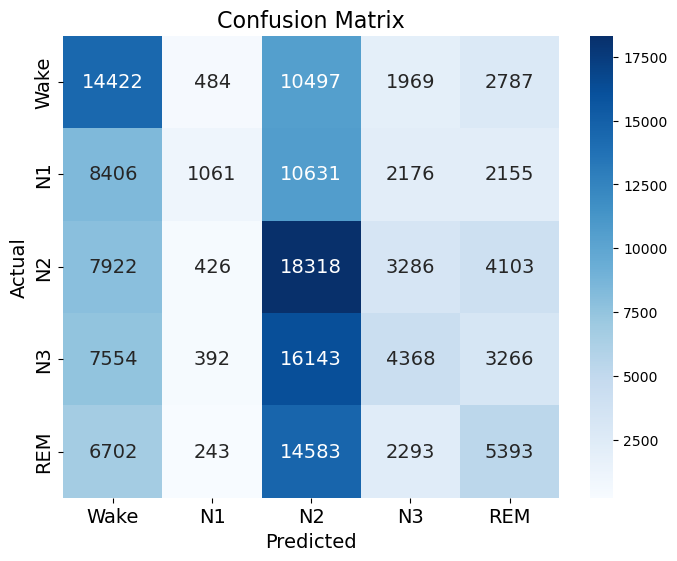

In [91]:
#plot the confusion matrix plot for train data
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
cm = final_confusion_matrix_20cv

# Plot confusion matrix using seaborn
plt.figure(figsize=(8, 6))
font_size = 14
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Wake', 'N1', 'N2', 'N3', 'REM'], yticklabels=['Wake', 'N1', 'N2', 'N3', 'REM'], annot_kws={"size": font_size})
plt.ylabel('Actual', fontsize=font_size)
plt.xlabel('Predicted', fontsize=font_size)
plt.title('Confusion Matrix', fontsize=font_size+2)
plt.xticks(fontsize=font_size)
plt.yticks(fontsize=font_size)
plt.show()

In [92]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from imblearn.pipeline import Pipeline
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import GroupKFold
import numpy as np
import pandas as pd


# Wrap the RandomForestClassifier in a OneVsRestClassifier
ovr_classifier = OneVsRestClassifier(rf_classifier)

# Create the pipeline
pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('classifier', ovr_classifier)
])

# Initialize GroupKFold
gkf = GroupKFold(n_splits=20)

# Initialize arrays to store results
fold_metrics = []
feature_importances = {i: [] for i in range(n_classes)}  # Store importances per class

# Loop through the folds in GroupKFold
for train_index, test_index in gkf.split(X_selected, y_resampled, groups=groups_resampled):
    X_train, X_test = X_selected.iloc[train_index], X_selected.iloc[test_index]
    y_train, y_test = y_resampled.iloc[train_index], y_resampled.iloc[test_index]

    # Fit the pipeline on the training set
    pipeline.fit(X_train, y_train)

    # Predict on the test set
    y_pred = pipeline.predict(X_test)

    # Calculate the confusion matrix
    fold_confusion_matrix = confusion_matrix(y_test, y_pred)

    # Collect feature importances for each class
    for i, estimator in enumerate(pipeline.named_steps['classifier'].estimators_):
        feature_importances[i].append(estimator.feature_importances_)

    # Collect and compute other metrics (omitted for brevity)

# Average the feature importances over all folds for each class
average_importances_cv20 = {class_idx: np.mean(importances, axis=0) for class_idx, importances in feature_importances.items()}


In [93]:
# Assume 'feature_names' is a list of your feature names from 'X_selected'
feature_names = X_selected.columns.tolist()

# Convert the dictionary of importances to a DataFrame
importances_df_cv20 = pd.DataFrame({
    'Feature': feature_names,
    'Class 0 Importances': average_importances_cv20[0],
    'Class 1 Importances': average_importances_cv20[1],
    'Class 2 Importances': average_importances_cv20[2],
    'Class 3 Importances': average_importances_cv20[3],
    'Class 4 Importances': average_importances_cv20[4]
})

# Adding a column for the overall importance (mean)
importances_df_cv20['Overall Importance (Mean)'] = importances_df_cv20[['Class 0 Importances', 'Class 1 Importances', 'Class 2 Importances', 'Class 3 Importances', 'Class 4 Importances']].mean(axis=1)

# Print or save the DataFrame
importances_df_cv20


,Feature,Class 0 Importances,Class 1 Importances,Class 2 Importances,Class 3 Importances,Class 4 Importances,Overall Importance (Mean)
0,SysTime_avg,0.008542,0.008527,0.009158,0.010834,0.010458,0.009504
1,SysTime_std,0.008905,0.009100,0.008174,0.009005,0.008535,0.008744
2,SysPeak_avg,0.010340,0.009366,0.008883,0.008936,0.009372,0.009379
3,SysArea_avg,0.009212,0.010695,0.009929,0.012119,0.012264,0.010844
4,SysArea_std,0.008905,0.010528,0.008527,0.007111,0.007492,0.008513
...,...,...,...,...,...,...,...
97,PPG_WTF_L5_Energy,0.008051,0.008828,0.008422,0.007872,0.008120,0.008258
98,PPG_LC,0.016288,0.009492,0.010845,0.008634,0.011061,0.011264
99,PPG_HFD,0.009983,0.009137,0.009141,0.009346,0.008580,0.009237
100,PPG_RR,0.008466,0.009722,0.009424,0.007531,0.008260,0.008681


# Feature Importances

In [94]:
# Assuming importances_df_cv10, importances_df_cv5, importances_df_cv20 are already defined
# Step 1: Merge the dataframes on the 'Feature' column
merged_df = pd.merge(importances_df_cv10, importances_df_cv5, on='Feature', suffixes=('_cv10', '_cv5'))
merged_df = pd.merge(merged_df, importances_df_cv20, on='Feature')

# Step 2: Calculate the average importance for each class across the three validation methods
merged_df['Class 0 Average'] = merged_df[['Class 0 Importances_cv10', 'Class 0 Importances_cv5', 'Class 0 Importances']].mean(axis=1)
merged_df['Class 1 Average'] = merged_df[['Class 1 Importances_cv10', 'Class 1 Importances_cv5', 'Class 1 Importances']].mean(axis=1)
merged_df['Class 2 Average'] = merged_df[['Class 2 Importances_cv10', 'Class 2 Importances_cv5', 'Class 2 Importances']].mean(axis=1)
merged_df['Class 3 Average'] = merged_df[['Class 3 Importances_cv10', 'Class 3 Importances_cv5', 'Class 3 Importances']].mean(axis=1)
merged_df['Class 4 Average'] = merged_df[['Class 4 Importances_cv10', 'Class 4 Importances_cv5', 'Class 4 Importances']].mean(axis=1)


# Step 3: Calculate the overall mean importance from the averages of each class
merged_df['Overall Importance (Mean)'] = merged_df[['Class 0 Average', 'Class 1 Average', 'Class 2 Average', 'Class 3 Average', 'Class 4 Average']].mean(axis=1)

# Optionally, create a DataFrame to view or export just the features and their importances
final_df = merged_df[['Feature', 'Class 0 Average', 'Class 1 Average', 'Class 2 Average', 'Class 3 Average', 'Class 4 Average', 'Overall Importance (Mean)']]
final_df

,Feature,Class 0 Average,Class 1 Average,Class 2 Average,Class 3 Average,Class 4 Average,Overall Importance (Mean)
0,SysTime_avg,0.008522,0.008527,0.009239,0.010771,0.010465,0.009505
1,SysTime_std,0.008871,0.009071,0.008197,0.009029,0.008537,0.008741
2,SysPeak_avg,0.010309,0.009421,0.008893,0.008893,0.009370,0.009377
3,SysArea_avg,0.009235,0.010651,0.010028,0.012120,0.012326,0.010872
4,SysArea_std,0.008864,0.010472,0.008512,0.007133,0.007537,0.008504
...,...,...,...,...,...,...,...
97,PPG_WTF_L5_Energy,0.008055,0.008796,0.008444,0.007897,0.008117,0.008262
98,PPG_LC,0.016391,0.009541,0.010850,0.008647,0.010945,0.011275
99,PPG_HFD,0.010009,0.009224,0.009231,0.009426,0.008655,0.009309
100,PPG_RR,0.008428,0.009714,0.009401,0.007503,0.008305,0.008670


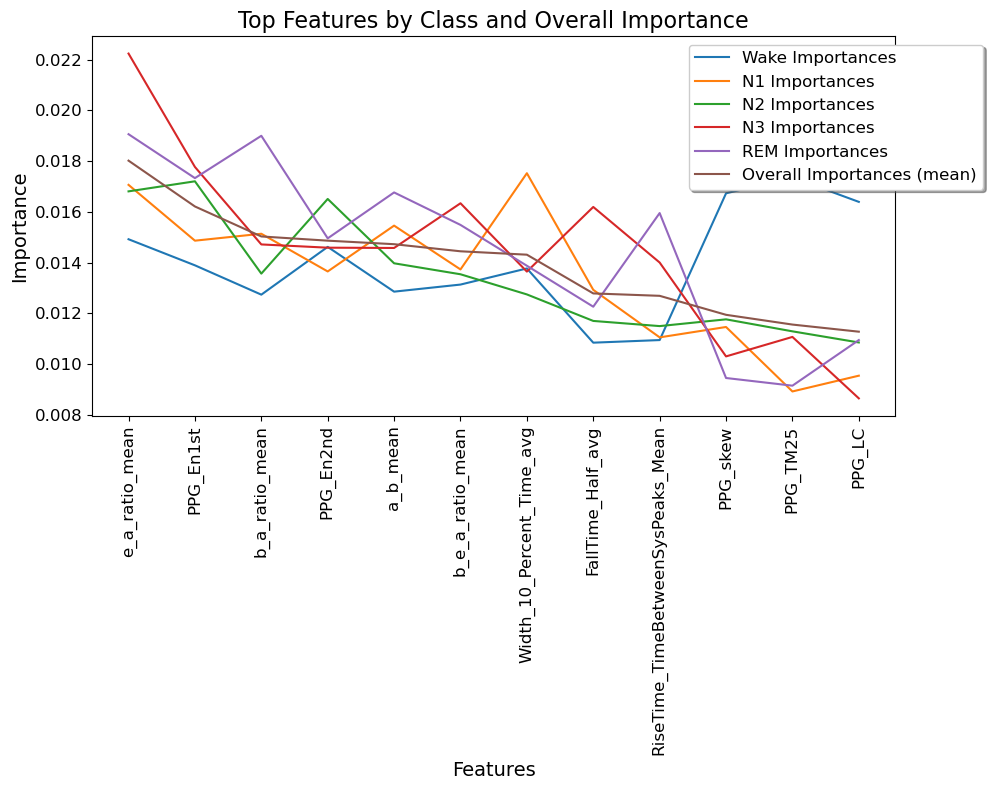

In [95]:
import seaborn as sns
import matplotlib.pyplot as plt

# Top 10 for each class
top_class_0 = final_df.nlargest(5, 'Class 0 Average')['Feature']
top_class_1 = final_df.nlargest(5, 'Class 1 Average')['Feature']
top_class_2 = final_df.nlargest(5, 'Class 2 Average')['Feature']
top_class_3 = final_df.nlargest(5, 'Class 3 Average')['Feature']
top_class_4 = final_df.nlargest(5, 'Class 4 Average')['Feature']
top_overall = final_df.nlargest(5, 'Overall Importance (Mean)')['Feature']

# Combine and deduplicate the lists of top features
top_features = pd.concat([top_class_0, top_class_1, top_class_2, top_class_3, top_class_4, top_overall]).drop_duplicates()

# Filter the DataFrame to only include the top features
filtered_df = final_df[final_df['Feature'].isin(top_features)]

# Sort the DataFrame by 'Overall Importance (Mean)' in descending order for plotting
filtered_df = filtered_df.sort_values(by='Overall Importance (Mean)', ascending=False)

# Melt the DataFrame for easier plotting
melted_df = pd.melt(filtered_df, id_vars=['Feature'], var_name='Class', value_name='Importance')

# Plotting
plt.figure(figsize=(10, 8))  # Adjust the figure size if needed
lineplot = sns.lineplot(data=melted_df, x='Feature', y='Importance', hue='Class')

# Customize the x-axis with feature names
plt.xticks(rotation=90, fontsize=12)  # Rotate the x labels for better readability
plt.yticks(fontsize=12)

plt.title('Top Features by Class and Overall Importance', fontsize=16)
plt.xlabel('Features', fontsize=14)
plt.ylabel('Importance', fontsize=14)
plt.grid(False)

# Customizing legend labels
handles, labels = lineplot.get_legend_handles_labels()
new_labels = ['Wake Importances' if label == 'Class 0 Average' else label for label in labels]
new_labels = ['N1 Importances' if label == 'Class 1 Average' else label for label in new_labels]
new_labels = ['N2 Importances' if label == 'Class 2 Average' else label for label in new_labels]
new_labels = ['N3 Importances' if label == 'Class 3 Average' else label for label in new_labels]
new_labels = ['REM Importances' if label == 'Class 4 Average' else label for label in new_labels]
new_labels = ['Overall Importances (mean)' if 'Mean' in label else label for label in new_labels]  # Rename overall if used

plt.legend(handles=handles, labels=new_labels, loc='upper right', bbox_to_anchor=(1.12, 1), fontsize=12, frameon=True, shadow=True, fancybox=True)
plt.tight_layout()
plt.show()
